<a href="https://colab.research.google.com/github/Kealfeyne/Samsung_Bootcamp_Classic_ML/blob/main/3_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#разделяем subjects
#понизить пространства для похожих датчиков

In [36]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [37]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
dataset = pd.read_csv('/content/drive/MyDrive/Track3_dataset.csv')

#Обработаем данные

##Общее

In [39]:
dataset.head(3)

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,252.75,34.875,0.902847,7.45872,6.032490,1.0061,7.44575,6.30365,-0.021952,0.004114,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,3652.45,29.750,-4.069330,3.76168,8.279720,-5.9725,3.22273,6.90897,0.116054,-0.375968,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,504.76,34.375,-2.007540,-9.60180,0.773674,-1.8035,-9.58937,1.07368,0.020131,0.042189,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8


In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534601 entries, 0 to 534600
Data columns (total 53 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   timestamp          534601 non-null  float64
 1   handTemperature    530560 non-null  float64
 2   handAcc16_1        530560 non-null  float64
 3   handAcc16_2        530560 non-null  float64
 4   handAcc16_3        530560 non-null  float64
 5   handAcc6_1         530560 non-null  float64
 6   handAcc6_2         530560 non-null  float64
 7   handAcc6_3         530560 non-null  float64
 8   handGyro1          530560 non-null  float64
 9   handGyro2          530560 non-null  float64
 10  handGyro3          530560 non-null  float64
 11  handMagne1         530560 non-null  float64
 12  handMagne2         530560 non-null  float64
 13  handMagne3         530560 non-null  float64
 14  handOrientation1   530560 non-null  float64
 15  handOrientation2   530560 non-null  float64
 16  ha

In [41]:
dataset.describe()

,timestamp,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,534601.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,530560.000000,...,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,532055.000000,534601.000000
mean,1593.538159,32.451221,-4.435286,3.241949,4.079375,-4.375896,3.218250,4.262513,-0.008852,0.028801,...,-0.031911,0.002304,-28.756284,2.115624,14.723345,0.360159,-0.091093,0.303517,-0.173845,4.558615
std,1243.906483,1.754847,7.062004,7.224031,3.831257,7.068961,6.864782,3.822053,1.160112,0.926832,...,0.618840,2.036102,19.303887,22.253170,17.907491,0.301254,0.559400,0.344271,0.466304,2.318076
min,37.660000,27.500000,-114.755000,-82.550900,-73.949700,-61.214700,-61.824200,-61.577100,-19.690500,-7.609010,...,-7.701040,-14.019600,-172.865000,-136.951000,-102.716000,0.000003,-0.954848,-0.876838,-0.997040,1.000000
25%,475.500000,31.312500,-9.076360,0.682775,1.588777,-8.981072,0.687587,1.780160,-0.153182,-0.083315,...,-0.049003,-0.221911,-39.689950,-10.960850,2.252230,0.145023,-0.676392,0.006839,-0.580040,2.000000
50%,827.610000,32.875000,-5.465610,3.089205,4.157125,-5.434845,3.127145,4.413625,-0.004439,0.004013,...,-0.004481,0.000354,-26.285600,-0.014372,16.599500,0.240996,0.000000,0.322698,-0.281681,5.000000
75%,2876.990000,33.812500,0.383679,5.559742,6.864212,0.424770,5.592180,7.148178,0.130310,0.094342,...,0.048972,0.032649,-14.549500,19.245900,25.947100,0.501671,0.410052,0.594198,0.252247,7.000000
max,4007.730000,35.250000,60.912600,155.532000,78.480100,34.159400,62.259800,60.843700,22.960000,11.862600,...,6.002540,14.482700,41.764800,92.867000,122.521000,1.000000,0.959538,0.920506,0.996105,8.000000


In [42]:
dataset.isna().sum().sort_values()

timestamp               0
subject_id              0
chestGyro3            809
chestOrientation4     809
chestOrientation3     809
chestOrientation2     809
chestOrientation1     809
chestMagne3           809
chestMagne2           809
chestMagne1           809
chestGyro1            809
chestAcc6_3           809
chestAcc6_2           809
chestAcc6_1           809
chestAcc16_3          809
chestAcc16_2          809
chestAcc16_1          809
chestTemperature      809
chestGyro2            809
ankleTemperature     2546
ankleAcc16_3         2546
ankleAcc6_1          2546
ankleAcc6_2          2546
ankleAcc6_3          2546
ankleGyro1           2546
ankleGyro2           2546
ankleAcc16_2         2546
ankleGyro3           2546
ankleMagne1          2546
ankleMagne2          2546
ankleMagne3          2546
ankleOrientation1    2546
ankleOrientation2    2546
ankleOrientation3    2546
ankleOrientation4    2546
ankleAcc16_1         2546
handOrientation3     4041
handAcc16_2          4041
handAcc16_3 

In [43]:
dataset.shape

(534601, 53)

In [44]:
dataset.drop(['timestamp', 'subject_id'], axis=1, inplace=True)

# Рассмотрим подходы

In [10]:
def analyze_model(model, dataset):
  """Возвращает модель, """
  model.fit_predict()

  predictions = model.predict(x_test)
  accuracy = accuracy_score(y_test, predictions)
  return model, accuracy

## Заполним пропуски медианами

In [45]:
for column in dataset.columns[dataset.isna().any()].tolist():
  dataset[column].fillna(dataset[column].median(), inplace=True)

In [46]:
dataset.isna().sum().sort_values().max()

0

In [47]:
def download_result(predictions, title, score):
  """Скачивает csv с predictions, скорость - """
  result = pd.DataFrame(predictions, columns=['activityID']).reset_index()

  predictions_values = result['activityID'].unique()

  dictionary = {predictions_values[i]: i + 1 for i in range(len(predictions_values))}

  result['activityID'] = result['activityID'].map(dictionary)

  result.to_csv(f"({round(score, 3)}) {title}.csv", index=False)
  files.download(f"({round(score, 3)}) {title}.csv")

In [48]:
from sklearn.metrics import silhouette_score

## Нормализуем данные (не дало результата)

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
def normalize_dataset(dataset):
  normalized_dataset = pd.DataFrame(MinMaxScaler(feature_range=(-1, 1)).fit_transform(dataset), columns=dataset.columns)
  return normalized_dataset

In [67]:
normalized_dataset = normalize_dataset(dataset)

In [76]:
current_dataset = dataset

In [69]:
current_dataset

,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,...,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4
0,0.903226,0.316781,-0.243880,0.049430,0.304774,0.116501,0.108974,-0.077687,-0.218028,-0.002221,...,-0.092825,0.120209,-0.014126,0.475287,0.429693,-0.139131,-0.587172,0.361335,0.824958,-0.504915
1,-0.419355,0.260172,-0.274937,0.078915,0.158432,0.048434,0.118863,-0.071216,-0.257068,-0.003070,...,-0.125321,0.026137,0.109089,0.304938,0.054566,-0.099597,0.156662,-0.594529,0.427357,-0.424779
2,0.774194,0.283645,-0.387196,-0.019570,0.245856,-0.158073,0.023532,-0.075714,-0.214117,-0.002973,...,-0.090883,0.122524,-0.016709,0.435475,0.333750,0.136659,-0.720452,0.704394,0.413902,0.608870
3,0.145161,0.155510,-0.257357,-0.017921,-0.001758,0.091830,0.019720,0.003793,-0.223637,-0.130109,...,0.169020,0.100088,-0.261531,0.361630,0.490811,0.101448,-0.167397,0.815971,0.316723,0.346731
4,0.548387,0.306343,-0.233743,0.027987,0.286698,0.134592,0.084772,-0.076983,-0.219209,-0.004454,...,-0.095510,0.119834,-0.016510,0.445141,0.157028,0.009701,-0.657738,-0.784260,0.257217,-0.590363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534596,0.645161,0.203076,-0.267044,0.008200,0.080484,0.105783,0.070938,-0.084039,-0.138931,0.303456,...,-0.158778,0.185903,-0.076372,0.377769,-0.013173,0.121763,-0.363662,-0.735762,0.594148,-0.312348
534597,0.387097,0.244275,-0.280586,0.024824,0.169707,0.046893,0.078097,-0.076866,-0.218039,-0.002493,...,0.048178,-0.134047,-0.230334,0.278132,0.468578,0.057888,-0.128229,0.687738,0.389276,0.487338
534598,0.854839,0.234006,-0.287036,-0.000755,0.150254,0.034053,0.048592,-0.066982,-0.255368,0.135169,...,-0.163104,0.118962,-0.044457,0.147770,0.371128,-0.096080,0.123302,0.308832,0.817799,0.152891
534599,-0.854839,0.368687,-0.218866,-0.148770,0.458752,0.089413,-0.094371,0.089526,0.064761,0.003981,...,-0.403514,0.175328,-0.407637,0.292550,0.095409,0.264921,-0.875679,-0.836874,-0.087353,-0.597395


## K-means

In [70]:
from sklearn.cluster import KMeans

In [71]:
clusters_number = 3
model = KMeans(clusters_number)
predictions = model.fit_predict(current_dataset)

In [73]:
score = silhouette_score(current_dataset.iloc[int(current_dataset.shape[0]*0.9):], predictions[int(current_dataset.shape[0]*0.9):])

In [74]:
score

0.2060729530589941

In [75]:
download_result(predictions, f'KMeans - {clusters_number} clusters', score)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Подбор оптимального количества кластеров

Метод локтей - 3 или 5 кластеров

In [110]:
analysis_models = pd.DataFrame([], index=range(2, 13), columns=['inertia', 'score'])

for n in range(2, 13):
  model = KMeans(n, random_state=6)
  predictions = model.fit_predict(dataset)
  score = silhouette_score(dataset.iloc[int(dataset.shape[0]*0.95):], predictions[int(dataset.shape[0]*0.95):])

  analysis_models.loc[n]['inertia'] = model.inertia_
  analysis_models.loc[n]['score'] = score

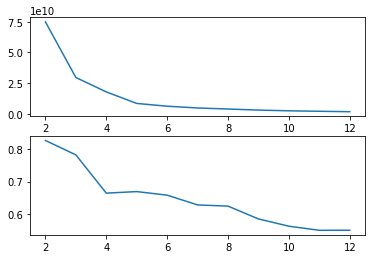

In [127]:
fig, axs = plt.subplots(2)
axs[0].plot(analysis_models['inertia'])
axs[1].plot(analysis_models['score'])
plt.show()